In [146]:
# importing the libraries
import os
from tensorflow.keras.models import Sequential
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense , Conv2D, Flatten, MaxPooling2D

# Function for loading the images 

In [147]:
def data_loader(path_train, path_test):
  train_list=os.listdir(path_train)
  num_classes=len(train_list)
  x_train=[]
  y_train=[]
  x_test=[]
  y_test=[]
  for label, folder in enumerate(train_list):
    path1 = path_train+'/'+str(folder)
    images = os.listdir(path1)
    for file in images:
      path2 = path1+'/'+str(file)

      # Read the image form the directory
      img = cv2.imread(path2)
      grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      # Append image to the train data list
      x_train.append(grayscale_image)

      # Append class-label corresponding to the image
      y_train.append(label)

    # Loading testing data
    path1 = path_test+'/'+str(folder)
    images = os.listdir(path1)
    for file in images:
      path2=path1+'/'+str(file)

      # Read the image form the directory
      img = cv2.imread(path2)
      grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      # Append image to the test data list
      x_test.append(grayscale_image)

      # Append class-label corresponding to the image
      y_test.append(label)
  # Convert lists into numpy arrays
  x_train=np.asarray(x_train)
  y_train=np.asarray(y_train)
  x_test=np.asarray(x_test)
  y_test=np.asarray(y_test)
  return x_train,y_train,x_test,y_test


In [148]:

path_train = 'Data/train'
path_test = 'Data/test'
x_train,y_train,x_test,y_test = data_loader(path_train=path_train,path_test=path_test)

In [149]:
# printing the size of train set x_train
print(x_train.shape)
print(y_train.shape)

(1500, 32, 32)
(1500,)


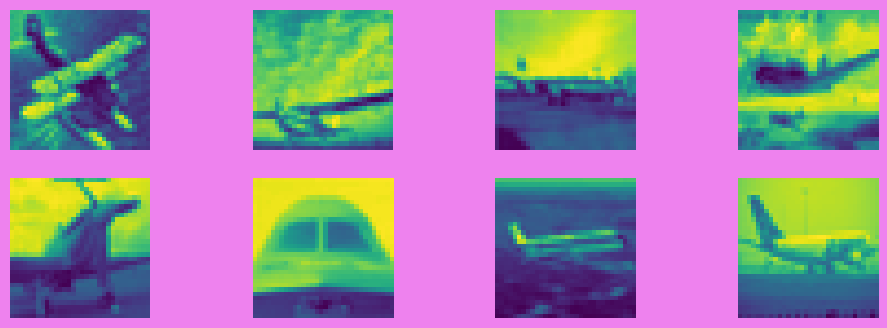

In [150]:
# Visualize four loaded images
sample_images = x_train[:8]
sample_labels = y_train[:8]
plt.figure(figsize=(12, 4),facecolor='violet')
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[i])
    # plt.title(categories[sample_labels[i]])
    plt.axis("off")
plt.show()

In [151]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train_split,x_valid_split,y_train_split,y_valid_split =  train_test_split(
    x_train, y_train, test_size=0.10, random_state=42)

(300, 32, 32)
(300, 3)


In [152]:
print(x_train_split.shape)
print(x_valid_split.shape)
print(y_train_split.shape)
print(y_valid_split.shape)

(1350, 32, 32)
(150, 32, 32)
(1350, 3)
(150, 3)


In [153]:
# converting the 32x32 set to 1024 set
x_train_split_vec = []
x_valid_split_vec = []
for k in x_train_split:
    temp  =[]
    for j in k:
        for i in j:
            temp.append(i)
    x_train_split_vec.append(temp)   
for k in x_valid_split:
    temp  =[]
    for j in k:
        for i in j:
            temp.append(i)
    x_valid_split_vec.append(temp)        

print(np.array(x_train_split_vec).shape)
print(np.array(x_valid_split_vec).shape)

(1350, 1024)
(150, 1024)


In [154]:
# normalizing 
for i in range(len(x_valid_split_vec)):
    for j in range(len(x_valid_split_vec[i])):
        x_valid_split_vec[i][j]  =  x_valid_split_vec[i][j]/255
for i in range(len(x_train_split_vec)):
    for j in range(len(x_train_split_vec[i])):
        x_train_split_vec[i][j]  =  x_train_split_vec[i][j]/255
print(np.array(x_train_split_vec).shape)
print(np.array(x_valid_split_vec).shape)        

(1350, 1024)
(150, 1024)


In [155]:

# # Training model


model = Sequential()
model.add(Dense(256, input_dim=32*32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(np.array(x_train_split_vec), np.array(y_train_split), validation_data=(np.array(x_valid_split_vec), np.array(y_valid_split)), epochs=500, batch_size=200)


Epoch 1/500
7/7 [==============================] - 1s 52ms/step - loss: 1.2365 - accuracy: 0.3170 - val_loss: 1.0485 - val_accuracy: 0.4400
Epoch 2/500
7/7 [==============================] - 0s 16ms/step - loss: 1.0519 - accuracy: 0.4237 - val_loss: 1.0429 - val_accuracy: 0.4667
Epoch 3/500
7/7 [==============================] - 0s 16ms/step - loss: 0.9800 - accuracy: 0.5467 - val_loss: 0.9749 - val_accuracy: 0.4933
Epoch 4/500
7/7 [==============================] - 0s 16ms/step - loss: 0.9230 - accuracy: 0.5652 - val_loss: 1.0136 - val_accuracy: 0.4733
Epoch 5/500
7/7 [==============================] - 0s 24ms/step - loss: 0.9064 - accuracy: 0.5585 - val_loss: 0.9285 - val_accuracy: 0.5267
Epoch 6/500
7/7 [==============================] - 0s 18ms/step - loss: 0.8699 - accuracy: 0.5704 - val_loss: 0.9072 - val_accuracy: 0.5333
Epoch 7/500
7/7 [==============================] - 0s 16ms/step - loss: 0.8494 - accuracy: 0.5844 - val_loss: 0.8692 - val_accuracy: 0.5400
Epoch 8/500
7/7 [===

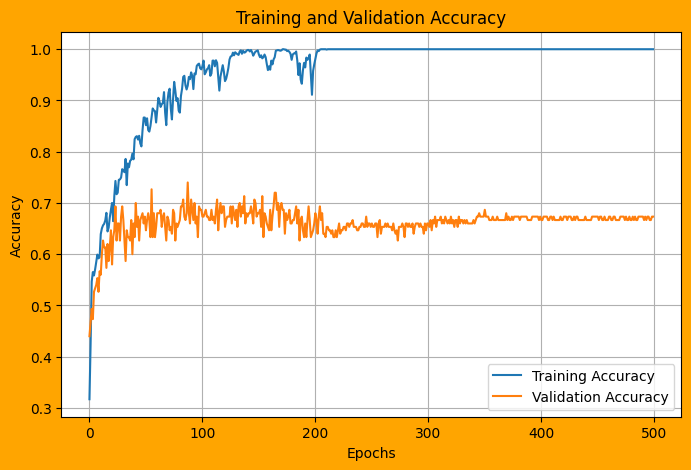

In [156]:

plt.figure(figsize=(8, 5),facecolor='orange')
plt.rcParams['figure.dpi'] = 100
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.grid(True)
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [160]:
x_test_vec = []
for k in x_test:
    temp  =[]
    for j in k:
        for i in j:
            temp.append(i)
    x_test_vec.append(temp)
print(np.array(x_test_vec).shape)    
print(np.array(y_test).shape)

(300, 1024)
(300, 3)


In [161]:
# normalizing
x_test_vec = np.array(x_test_vec)
y_test = np.array(y_test)
x_test_vec = x_test_vec/255.

In [162]:
history2 = model.fit(np.array(x_train_split_vec), np.array(y_train_split), validation_data=(x_test_vec, y_test), epochs=500, batch_size=200)


Epoch 1/500
7/7 [==============================] - 0s 44ms/step - loss: 1.0092e-05 - accuracy: 1.0000 - val_loss: 3.5347 - val_accuracy: 0.6900
Epoch 2/500
7/7 [==============================] - 0s 25ms/step - loss: 9.9663e-06 - accuracy: 1.0000 - val_loss: 3.5364 - val_accuracy: 0.6900
Epoch 3/500
7/7 [==============================] - 0s 26ms/step - loss: 9.8639e-06 - accuracy: 1.0000 - val_loss: 3.5370 - val_accuracy: 0.6900
Epoch 4/500
7/7 [==============================] - 0s 24ms/step - loss: 9.7680e-06 - accuracy: 1.0000 - val_loss: 3.5413 - val_accuracy: 0.6900
Epoch 5/500
7/7 [==============================] - 0s 26ms/step - loss: 9.6751e-06 - accuracy: 1.0000 - val_loss: 3.5455 - val_accuracy: 0.6900
Epoch 6/500
7/7 [==============================] - 0s 25ms/step - loss: 9.5788e-06 - accuracy: 1.0000 - val_loss: 3.5480 - val_accuracy: 0.6900
Epoch 7/500
7/7 [==============================] - 0s 24ms/step - loss: 9.4843e-06 - accuracy: 1.0000 - val_loss: 3.5510 - val_accuracy:

In [164]:
km= model.evaluate(x_test_vec,y_test)
print("the loss is : ",km[0])
print("the accuracy is : ",km[1])



10/10 [==============================] - 0s 3ms/step - loss: 4.5544 - accuracy: 0.6933
the loss is :  4.554385185241699
the accuracy is :  0.6933333277702332
